# Pandas and Visualization Homework with IMDb data

## Part 1

* read in 'imdb_1000.csv' and store it in a DataFrame named movies
* check the number of rows and columns
* check the data type of each column
* calculate the average movie duration
* sort the DataFrame by duration to find the shortest and longest movies
* create a histogram of duration
* use a box plot to display that same data

In [101]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [102]:
# read in 'imdb_1000.csv' and store it in a DataFrame named movies

movies = pd.read_csv('../DAT-DC-10/data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [103]:
# check the number of rows and columns
movies.shape

(979, 6)

In [104]:
# check the data type of each column

movies.dtypes


star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [105]:
# calculate the average movie duration

movies.duration.mean()


120.97957099080695

In [106]:
# sort the DataFrame by duration to find the shortest and longest movies

movies.duration.sort_values().head(1)
movies.duration.sort_values().tail(1)



476    242
Name: duration, dtype: int64

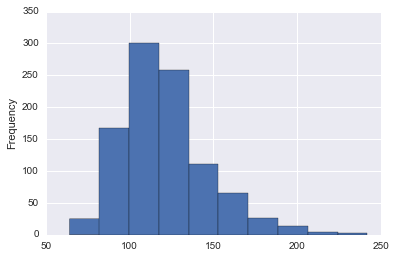

In [107]:
# create a histogram of duration

movies.duration.plot(kind="hist")


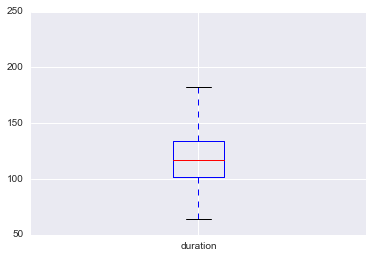

In [108]:
# use a box plot to display that same data

movies.duration.plot(kind='box')

## Part 2

* count how many movies have each of the content ratings
* use a visualization to display that same data, including a title and x and y labels
* convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP
* convert the following content ratings to "NC-17": X, TV-MA
* count the number of missing values in each column
* if there are missing values: examine them, then fill them in with "reasonable" values
* calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for * * movies shorter than 2 hours
* use a visualization to detect whether there is a relationship between duration and star rating
* calculate the average duration for each genre

In [109]:
# count how many movies have each of the content ratings

movies.groupby('content_rating').count()

,star_rating,title,genre,duration,actors_list
content_rating,,,,,
APPROVED,47,47,47,47,47
G,32,32,32,32,32
GP,3,3,3,3,3
NC-17,7,7,7,7,7
NOT RATED,65,65,65,65,65
PASSED,7,7,7,7,7
PG,123,123,123,123,123
PG-13,189,189,189,189,189
R,460,460,460,460,460


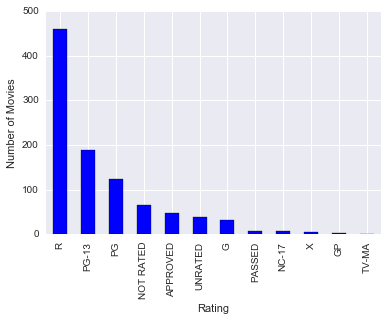

In [110]:
# use a visualization to display that same data, including a title and x and y labels

movies.content_rating.value_counts().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')

In [111]:
# convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP

movies.content_rating.replace(['NOT RATED','APPROVED','PASSED','GP'], 'UNRATED', inplace=True)


In [112]:
# convert the following content ratings to "NC-17": X, TV-MA

movies.content_rating.replace(['X', 'TV-MA'], 'NC-17', inplace=True)

In [113]:
# count the number of missing values in each column

movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

In [114]:
# if there are missing values: examine them, then fill them in with "reasonable" values

movies[movies.content_rating.isnull()]
movies.content_rating.fillna('UNRATED', inplace=True)
movies[movies.title == 'True Grit']

,star_rating,title,content_rating,genre,duration,actors_list
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [115]:
# calculate the average star rating for movies 2 hours or longer, and 
# compare that with the average star rating for movies shorter than 2 hours

movies[movies.duration >= 120].star_rating.mean()
movies[movies.duration < 120].star_rating.mean()

7.838666666666657

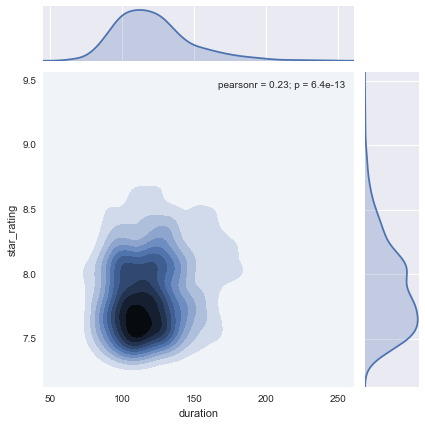

In [121]:
# use a visualization to detect whether there is a relationship between duration and star rating

sns.jointplot('duration', 'star_rating', data=movies, kind='kde')


In [117]:
# calculate the average duration for each genre

movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Part 3

* visualize the relationship between content rating and duration
* determine the top rated movie (by star rating) for each genre
* check if there are multiple movies with the same title, and if so, determine if they are actually duplicates
* calculate the average star rating for each genre, but only include genres with at least 10 movies

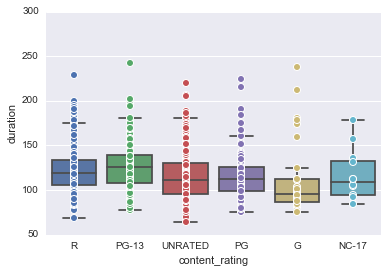

In [130]:
# visualize the relationship between content rating and duration

sns.boxplot(x="content_rating",y="duration",data=movies)
sns.stripplot(x="content_rating",y="duration",data=movies,jitter=False)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1143b78d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1148687d0>]], dtype=object)

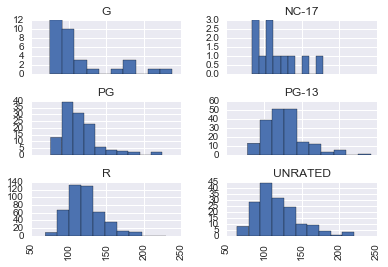

In [133]:
movies.hist(column='duration', by='content_rating', sharex=True)

In [148]:
# determine the top rated movie (by star rating) for each genre

movies.groupby('genre').title.first()


genre
Action                                     The Dark Knight
Adventure    The Lord of the Rings: The Return of the King
Animation                                    Spirited Away
Biography                                 Schindler's List
Comedy                                   Life Is Beautiful
Crime                             The Shawshank Redemption
Drama                                         12 Angry Men
Family                          E.T. the Extra-Terrestrial
Fantasy                          The City of Lost Children
Film-Noir                                    The Third Man
History                                Battleship Potemkin
Horror                                              Psycho
Mystery                                        Rear Window
Sci-Fi                                        Blade Runner
Thriller                                 Shadow of a Doubt
Western                     The Good, the Bad and the Ugly
Name: title, dtype: object

In [162]:
# check if there are multiple movies with the same title, 
# and if so, determine if they are actually duplicates

dupes = movies[movies.title.duplicated()].title
movies[movies.title.isin(dupes)]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [171]:
# calculate the average star rating for each genre, 
# but only include genres with at least 10 movies

# movies[movies.groupby('genre').duration.mean()

movies.groupby('genre').star_rating.mean()[movies.genre.value_counts() >= 10]


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

## Bonus

Figure out something "interesting" using the actors data!